In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,date
import pandas_datareader as pdr
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
def get_stock_data(ticker,stat,end):
    data=pdr.data.DataReader(ticker,'yahoo',start,end)
    data.insert(0,"Ticker",ticker)
    return data

In [3]:
start=datetime(2012,1,1)
end=datetime(2014,12,31)

In [10]:
get_stock_data("MSFT",start,end)

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,MSFT,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,MSFT,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,MSFT,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,MSFT,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,MSFT,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...,...
2014-12-24,MSFT,48.639999,48.080002,48.639999,48.139999,11437800.0,42.877026
2014-12-26,MSFT,48.410000,47.820000,48.410000,47.880001,13197800.0,42.645451
2014-12-29,MSFT,47.779999,47.259998,47.700001,47.450001,14439500.0,42.262455


In [4]:
def get_dat_for_multiple_stocks(tickers,start,end):
    stocks=dict()
    for ticker in tickers:
        s=get_stock_data(ticker,start,end)
        stocks[ticker]=s
    return stocks

In [5]:
raw=get_dat_for_multiple_stocks(
    ["WMT","AMZN","COST","HD","TGT","LOW","JD","BABA","BBY","TJX","002024.SZ","0001.HK","IDEXF","001045.KS","CEC.DE","M","DG"],
    start,end
)

In [6]:
def pivot_ticker_to_columns(raw,column):
    items=[]
    for key in raw:
        data=raw[key]
        subset=data[["Ticker",column]]
        items.append(subset)
    combined=pd.concat(items)
    ri=combined.reset_index()
    return ri.pivot("Date","Ticker",column)

In [7]:
close_px=pivot_ticker_to_columns(raw,"Close")

In [8]:
close_px[:5]

Ticker        0001.HK     001045.KS  002024.SZ  ...  \
Date                                            ...   
2012-01-02        NaN  16913.000000        NaN  ...   
2012-01-03  67.076302  16956.500000        NaN  ...   
2012-01-04  67.040604  16739.099609       8.38  ...   
2012-01-05  66.790398  16869.599609       8.30  ...   
2012-01-06  65.468201  16782.599609       8.29  ...   

Ticker            TGT        TJX        WMT  
Date                                         
2012-01-02        NaN        NaN        NaN  
2012-01-03  51.119999  15.927500  60.330002  
2012-01-04  50.000000  16.107500  59.709999  
2012-01-05  48.509998  16.577499  59.419998  
2012-01-06  48.950001  16.615000  59.000000  

[5 rows x 17 columns]

In [9]:
fig = px.line(close_px )
fig.show()

In [10]:
#вычисление ежедневного процентного изменения
daily_pc=close_px/close_px.shift(1)-1

<AxesSubplot:xlabel='Date'>

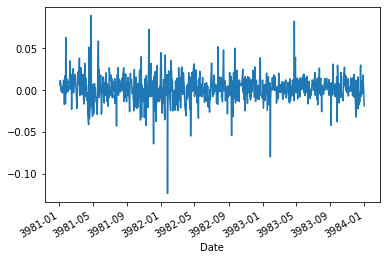

In [25]:
daily_pc["AAPL"].plot()

In [11]:
# вычисляем корреляцию между котировками акций на основе ежедневного процентного изменения цены закрытия
corrs=daily_pc.corr()

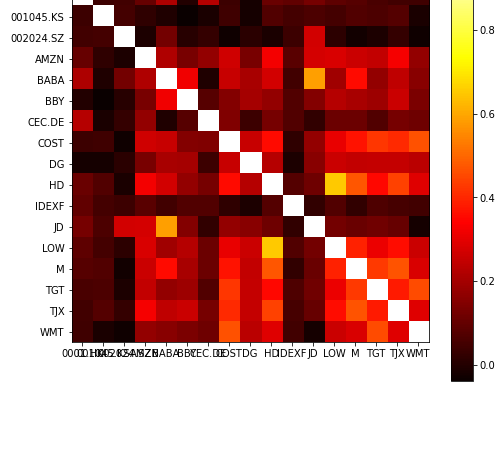

In [12]:
 # строим теплокарту корреляционной матрицы
 plt.imshow(corrs,cmap='hot', interpolation='none')
 plt.colorbar()
 plt.xticks(range(len(corrs)),corrs.columns)
 plt.yticks(range(len(corrs)),corrs.columns)
 plt.gcf().set_size_inches(8,8)